In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io import wavfile

# Sound Pressure
A sound can be described by means of the time-varying sound pressure, $p(t)$. The unit for sound pressure is the pascal, $Pa$. 
<br>
<br>
The following sound pressure thresholds are relevant in psychoacoustics:
- Absolute Threshold: $10^{-5} Pa$
- Pain Threshold: $10^2 Pa$ 

The sound pressure level, $L$, is a logrithmic measure of sound pressure. The relationship between the sound pressure and the sound pressure level is as follows:
$$ L = 20 log \left( \frac{p}{p_0} \right) dB $$
where $p_0$ is the reference value of the sound pressure, standardized to:
$$ p_0 = 20 \mu Pa $$

In [2]:
def sound_pressure_level(p):
    """Calculate the sound pressure level

    Parameters
    ----------
    p : float
        sound pressure (Pa)

    """
    p0 = 20e-6
    return 20 * np.log10(p/p0)

# Sound Intensity
Sound intensity, $I$, is related to sound pressure level as follows:
$$ L = 20 log \left( \frac{p}{p_0} \right) dB = 10 log \left( \frac{I}{I_0} \right) dB$$
where $I_0$ is the reference value of sound intensity, standardized to:
$$ I_0 = 10^{-12} \frac{W}{m^2} $$

In [3]:
def sound_intensity_level(I):
    """Calculate the sound intensity level

    Parameters
    ----------
    I : float
        sound intensity (W/m^2)

    """
    I0 = 10e-12
    return 10 * np.log10(I/I0)

# Sound Density
Sound density is a measure of the sound intensity within a bandwidth of 1 Hz. It is useful measure when dealing with noises. The sound density is sometimes referred to as "noise power density", although this is not quite correct. The sound density level, $l$, is a logrithmic measure of sound density. For white noise, where the sound density level is independent of frequency, the sound desity level can be calculated using the following equation:
$$ l = L - 10 log \left( \frac{\Delta f}{Hz} \right) dB $$
where $\Delta f$ represents the bandwidth of the sound in question measured in Hz.

In [4]:
def sound_density_level_for_white_noise(L, delta_f):
    """Calculate the sound density level for white noise in dB

    Parameters
    ----------
    L : float
        sound pressure level or sound intensity level (dB)
    delta_f : float
        bandwidth (Hz)

    """
    return L - 10 * np.log10(delta_f)

 # Commonly Used Stimuli in Psychoacoustics
 Illustrated below are several time functions and associated frequency spectra of stimuli commonly used in psychoacoustics.
 <br>
 <br>
![](images/audio_stimuli.png)
<br>From "_Psychoacoustics: Facts and models_" (4th ed., pp. 2–2) by Fastl, H., &amp; Zwicker, E. (2010).

## Pure Tone
A pure tone is a continuous sinusoidal oscillation of the sound pressure $p$, as a function of time $t$. The equation for a pure tone is:
$$\begin{aligned}
&p(t) = A \, sin(2 \pi f t \, + \, \theta) \\
& \quad \text{where:} \\
& \quad \quad A \quad \text{: amplitude of the pressure change} \\
& \quad \quad f \quad \text{: tone frequency} \\
& \quad \quad \theta \quad \text{: phase of the sinusoidal oscillation} \\
\end{aligned}$$
In the frequency domain, a pure tone results in a single spectral component at the tone frequency.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Decrease the amplitude of the tone__
> <br> How much do you have to decrease the amplitude by for the audio to sound half as loud?
> <br> <br>  
> 1. __Change the phase of the tone__
> <br> Do you hear a difference in the way the audio sounds for different phases?
> <br> <br>  
> 1. __Increase the tone frequency beyond the Nyquist frequency,__ $\frac{F_s}{2}$
> <br> How does the audio sound as the tone frequency approaches $F_s$?
> <br> <br>  


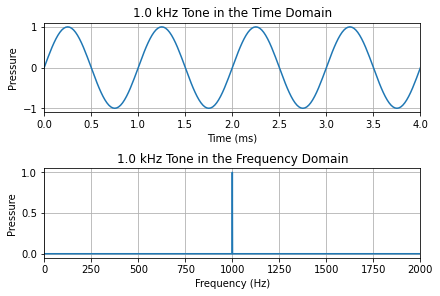

In [5]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Amplitude
# Note: amplitudes greater than 1.0 will cause clipping in the audio output file
A = 1

# Tone frequency
# Note: fequencies greater than Fs/2 will cause aliasing
f_tone = 1e3

# Tone phase
theta_tone = 0

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate tone
tone = A *np.sin(2 * np.pi * f_tone * time + theta_tone)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot tone in the time domain
num_periods_to_plot = 4
ax_time.grid()
ax_time.plot(time_ms, tone)
ax_time.set_title('{0} kHz Tone in the Time Domain'.format(f_tone/1000))
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, num_periods_to_plot / f_tone * 1000))

# Plot tone in the frequency domain
N = len(time)
tone_fft = fft(tone)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(tone_fft[0:N//2]))
ax_freq.set_title('{0} kHz Tone in the Frequency Domain'.format(f_tone/1000))
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2*f_tone))

# Generate audio file
wavfile.write('audio/pure_tone.wav', int(Fs), tone.astype(np.float32))

## Beat Freqencies
A beat frequency occurs when two pure tones are summed together. The beat frequency is the difference in frequency between two pure tones. This results in a strong variation of the temporal envelope at the beat frequency. The sound pressure $p$, as a function of time $t$ is described using the following equation:
$$\begin{aligned}
p(t) &= A_1 \, sin \left( 2 \pi f_1 t \, + \, \theta_1 \right) \; + \; A_2 \, sin(2 \pi f_2 t \, + \, \theta_2) \\
& \text{where:} \\
& \quad \quad f_{beat} = \left| f_1 - f_2 \right| \\
\end{aligned}$$
In the frequency domain, beat frequencies appear as two individual spectral components separated by the beat frequency.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Adjust the amplitude of each tone independently__
> <br> - What happens to the temporal envelope when the tone amplitudes are changed? 
> <br> - Does the temporal envelope still cross the x-axis?
> <br> - How does this affect the perceived beat frequency in the audio signal?
> <br> <br>  

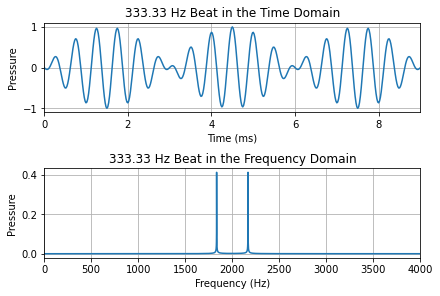

In [6]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Amplitude
# Note: If the sum of the amplitudes is greater than 1.0, there will be clipping in the audio output file
A_1 = 0.5
A_2 = 0.5

# Calculate tone frequencies from the beat frequency
# Note: fequencies greater than Fs/2 will cause aliasing
f_beat = 333.33
f_tone_center = 2e3
f_tone_1 = f_tone_center - f_beat/2
f_tone_2 = f_tone_center + f_beat/2

# Tone phase
theta_tone_1 = 0
theta_tone_2 = np.pi

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate tones
tone_1 = A_1 *np.sin(2 * np.pi * f_tone_1 * time + theta_tone_1)
tone_2 = A_2 *np.sin(2 * np.pi * f_tone_2 * time + theta_tone_2)
tone = tone_1 + tone_2

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot tone in the time domain
num_beats_to_plot = 3
x_lim_time = num_beats_to_plot / np.abs(f_tone_2 - f_tone_1) * 1000
ax_time.grid()
ax_time.plot(time_ms, tone)
ax_time.set_title('{0:.2f} Hz Beat in the Time Domain'.format(f_beat))
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, x_lim_time))

# Plot tone in the frequency domain
N = len(time)
tone_fft = fft(tone)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(tone_fft[0:N//2]))
ax_freq.set_title('{0:.2f} Hz Beat in the Frequency Domain'.format(f_beat))
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2*f_tone_center))

# Generate audio file
wavfile.write('audio/beat_frequency.wav', int(Fs), tone.astype(np.float32))